In [3]:
# Importing python packages 
import numpy as np  # numpy!
import seaborn as sns # visualisation!
import matplotlib.pyplot as plt # visualisation!
import pandas as pd # dataframes & data analysis!
## need this for train test split 
from sklearn.model_selection import train_test_split

## need a modeling library (statsmodels) 
import statsmodels.api as sm
import statsmodels.tools

In [65]:
# Importing the data 
dataset = 'Life Expectancy Data.csv'
df = pd.read_csv(dataset)

In [66]:
pd.reset_option('display.max_columns')
df.head(2)


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8


In [6]:
## We are going to make a list of all of our columns, and then remove price from that list - since we don't want to include the price in X
## seperate features from targets 
feature_cols = list(df.columns) ##select all columns 
feature_cols.remove('Life_expectancy') ## reomve price as this is the target 

In [7]:
feature_cols

['Country',
 'Region',
 'Year',
 'Infant_deaths',
 'Under_five_deaths',
 'Adult_mortality',
 'Alcohol_consumption',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Diphtheria',
 'Incidents_HIV',
 'GDP_per_capita',
 'Population_mln',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling',
 'Economy_status_Developed',
 'Economy_status_Developing']

In [67]:
X = df[feature_cols] ## dataframe holding all features 
y = df['Life_expectancy'] ##target looking to predict 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, ##features 
                                                    y, ##targets 
                                                    test_size = 0.2,## %allocated to the test
                                                    random_state = 84)## want the same train set each time 

In [69]:
all(X_train.index == y_train.index) ##check 

True

In [70]:
all(X_test.index == y_test.index) ##check 

True

In [71]:
#Handling missing values
def null_vals(dataframe):
#Function to show both number of nulls and the percentage of nulls in the whole column
    null_vals = dataframe.isnull().sum() # How many nulls in each column
    total_cnt = len(dataframe) # Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) # Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) # Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False) #Return the number and percentage of missing values, order by percentage descending
null_vals(X_train) #Display the table

,null,percent
Country,0,0.0
Region,0,0.0
Economy_status_Developed,0,0.0
Schooling,0,0.0
Thinness_five_nine_years,0,0.0
Thinness_ten_nineteen_years,0,0.0
Population_mln,0,0.0
GDP_per_capita,0,0.0
Incidents_HIV,0,0.0
Diphtheria,0,0.0


In [72]:
X_train.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
dtype: object

In [136]:
X_train1 = pd.get_dummies(X_train, columns = ['Region'], drop_first = True, prefix = 'Region', dtype = int)
X_train2 = pd.get_dummies(X_train1, columns = ['Country'], drop_first = True, prefix = 'Country', dtype = int)
X_train2.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Vietnam,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
233,2013,16.2,18.9,117.1050,1.84,60,74,31.8,81,67,...,0,0,0,0,0,0,0,0,0,0
2427,2004,6.2,7.1,60.3570,6.61,85,31,27.0,89,89,...,0,0,0,0,0,0,0,0,0,0
2711,2011,6.1,7.2,171.1380,10.11,89,92,26.3,92,92,...,0,0,0,0,0,0,0,0,0,0
2061,2006,16.5,19.3,86.8100,1.41,98,76,24.0,98,98,...,0,0,0,0,0,0,0,0,0,0
2365,2010,4.4,5.2,74.2785,10.01,88,86,27.0,94,94,...,1,0,0,0,0,0,0,0,0,0


In [44]:
X_train['Economy_status_Developed'].unique()

array([0, 1], dtype=int64)

In [45]:
X_train['Economy_status_Developing'].unique()

array([1, 0], dtype=int64)

Q fir client -- is there another status ???? 

In [53]:
X_train[(X_train.Economy_status_Developed == 0) & (X_train.Economy_status_Developing == 0)] ##check if developing vs developed is mutually exclusive 

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing


In [81]:
unique_country = pd.DataFrame(X_train['Country'].unique())

In [82]:
unique_country

,0
0,Samoa
1,Malta
2,Latvia
3,Maldives
4,United Kingdom
...,...
174,Thailand
175,"Bahamas, The"
176,Nigeria
177,Cameroon


In [87]:
pd.set_option('display.max_rows', 180)

In [88]:
unique_country.sort_values(by=0,ascending=True)

,0
122,Afghanistan
9,Albania
145,Algeria
137,Angola
51,Antigua and Barbuda
100,Argentina
25,Armenia
82,Australia
116,Austria
109,Azerbaijan


In [66]:
X_train['Country'].str.lower().str.strip().nunique()

179

In [90]:
unique_region = pd.DataFrame(X_train['Region'].unique()).sort_values(by=0)

In [91]:
unique_region

,0
4,Africa
2,Asia
5,Central America and Caribbean
1,European Union
6,Middle East
8,North America
0,Oceania
3,Rest of Europe
7,South America


In [49]:
pd.reset_option('display.max_rows', 205)
pd.reset_option('display.max_columns', 205)

In [57]:
##check correlation 
dfOHE2[['Life_expectancy', 'Region_Asia', 'Region_Oceania']].corr(numeric_only=True)

,Life_expectancy,Region_Asia,Region_Oceania
Life_expectancy,1.000000,0.026836,0.018001
Region_Asia,0.026836,1.000000,-0.107845
Region_Oceania,0.018001,-0.107845,1.000000


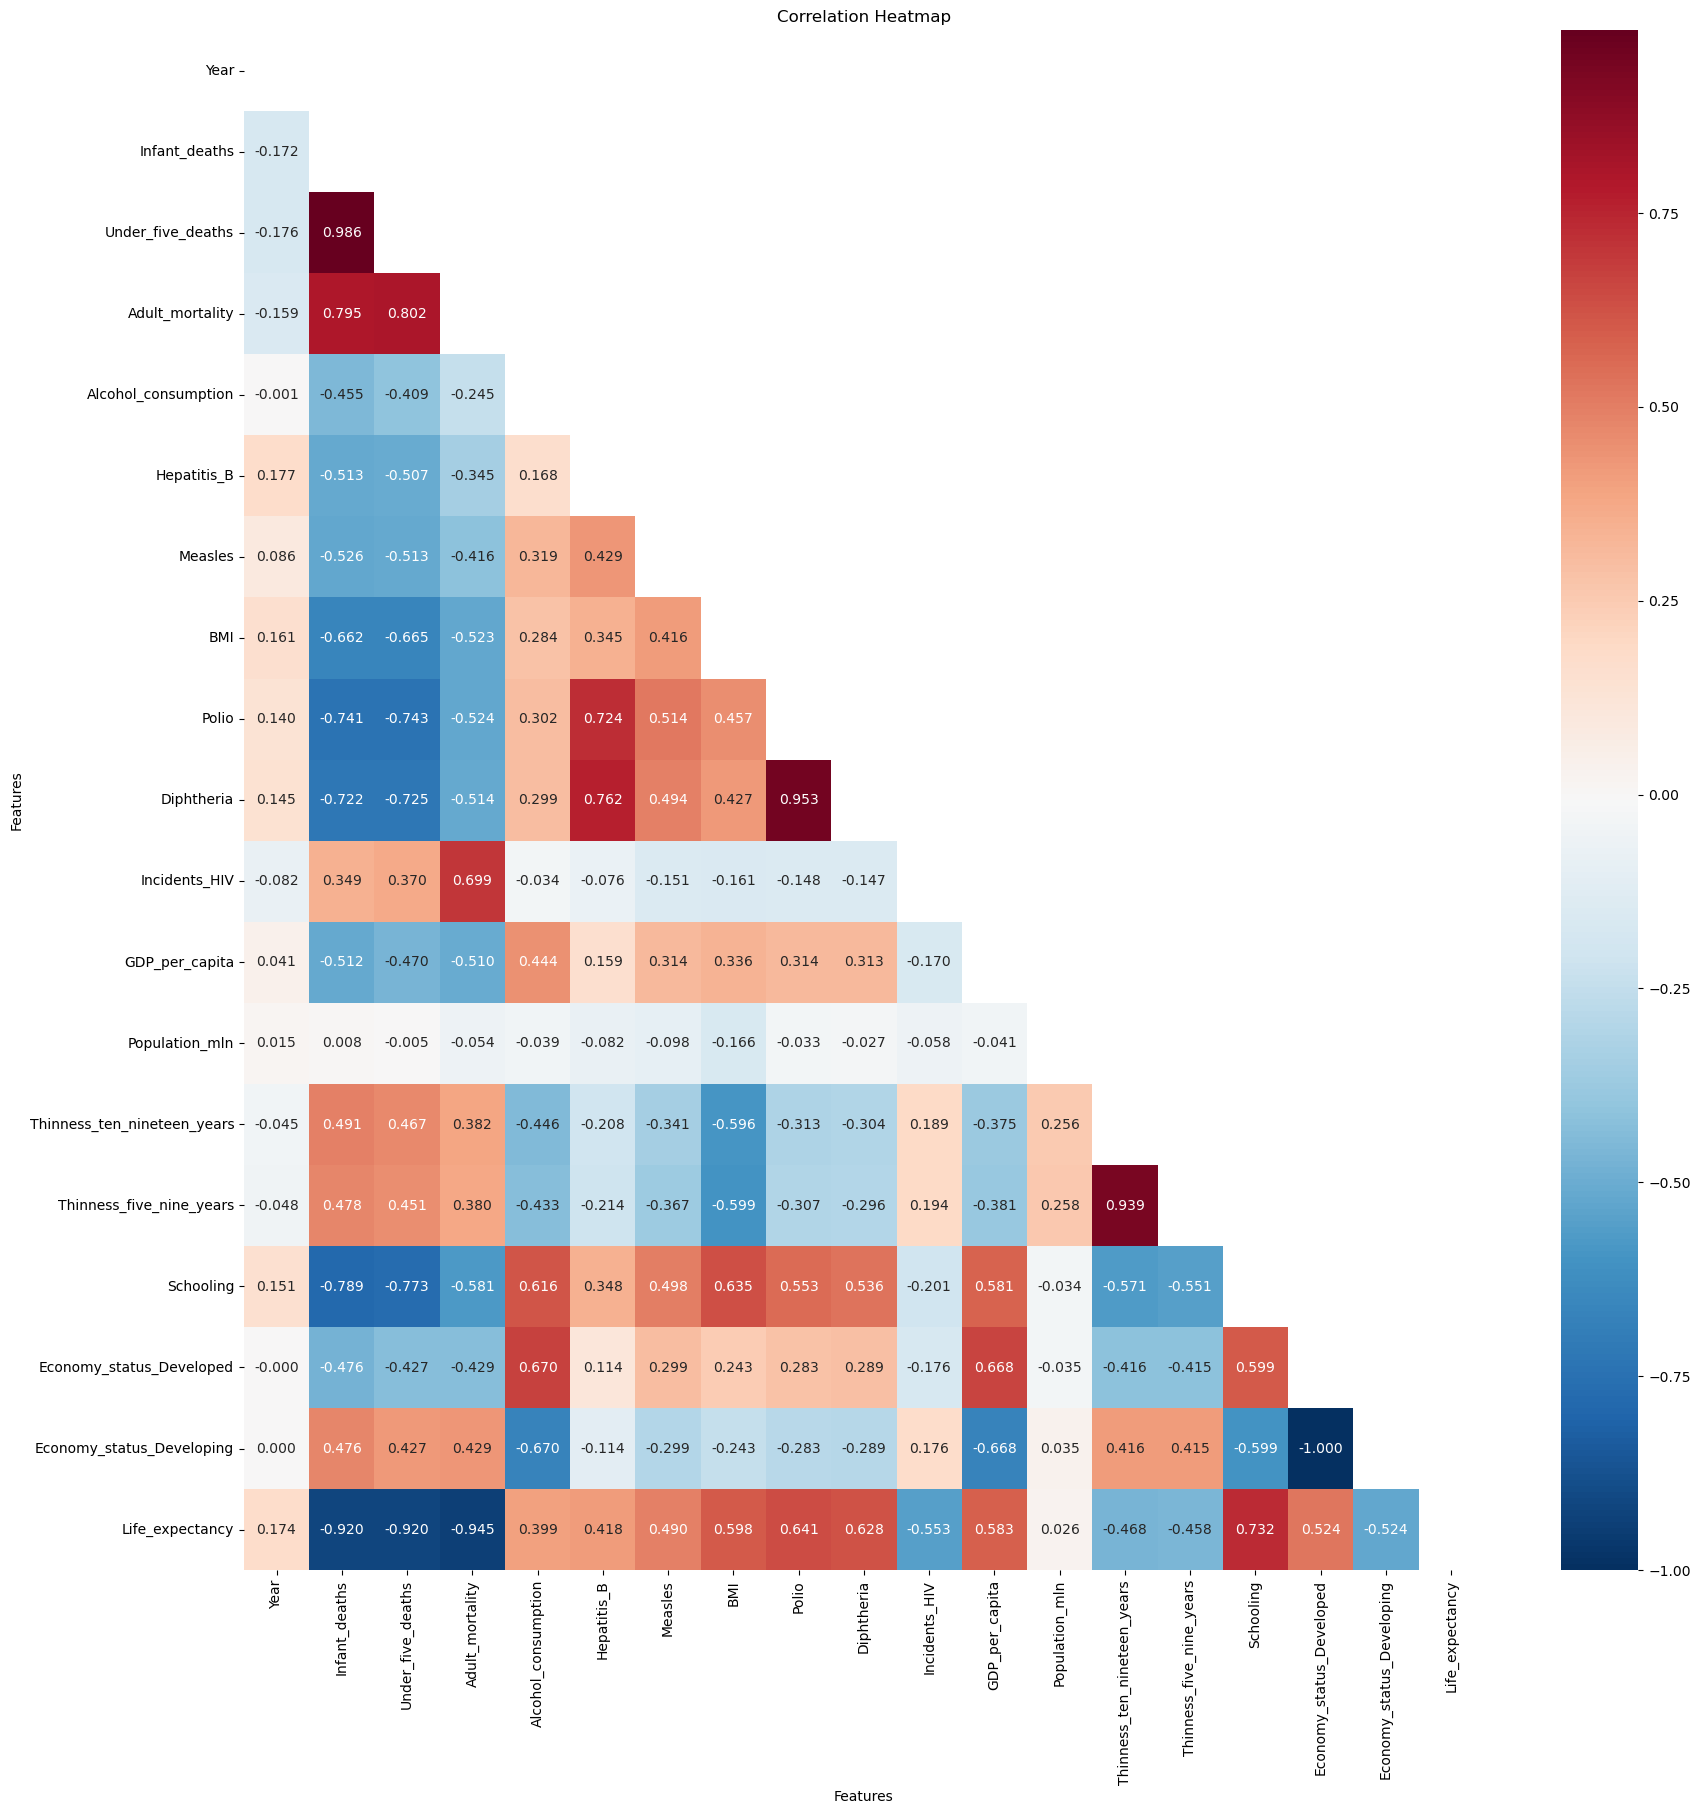

In [108]:
plt.figure(figsize=(20, 20))

# Create the heatmap
sns.heatmap(df.corr(numeric_only=True), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(df.corr(numeric_only=True)))

# Add a title and axis labels
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [ ]:
##looking at indopendant variabe correlations 

In [ ]:
## remove develpoed vs developing 

In [ ]:
## strong corr between infant mortality and death under 5 - remove infant 

In [ ]:
## strong corr between thinness 10 -19 and 5-9 

In [ ]:
## diphtheia polio and hep b all similar 

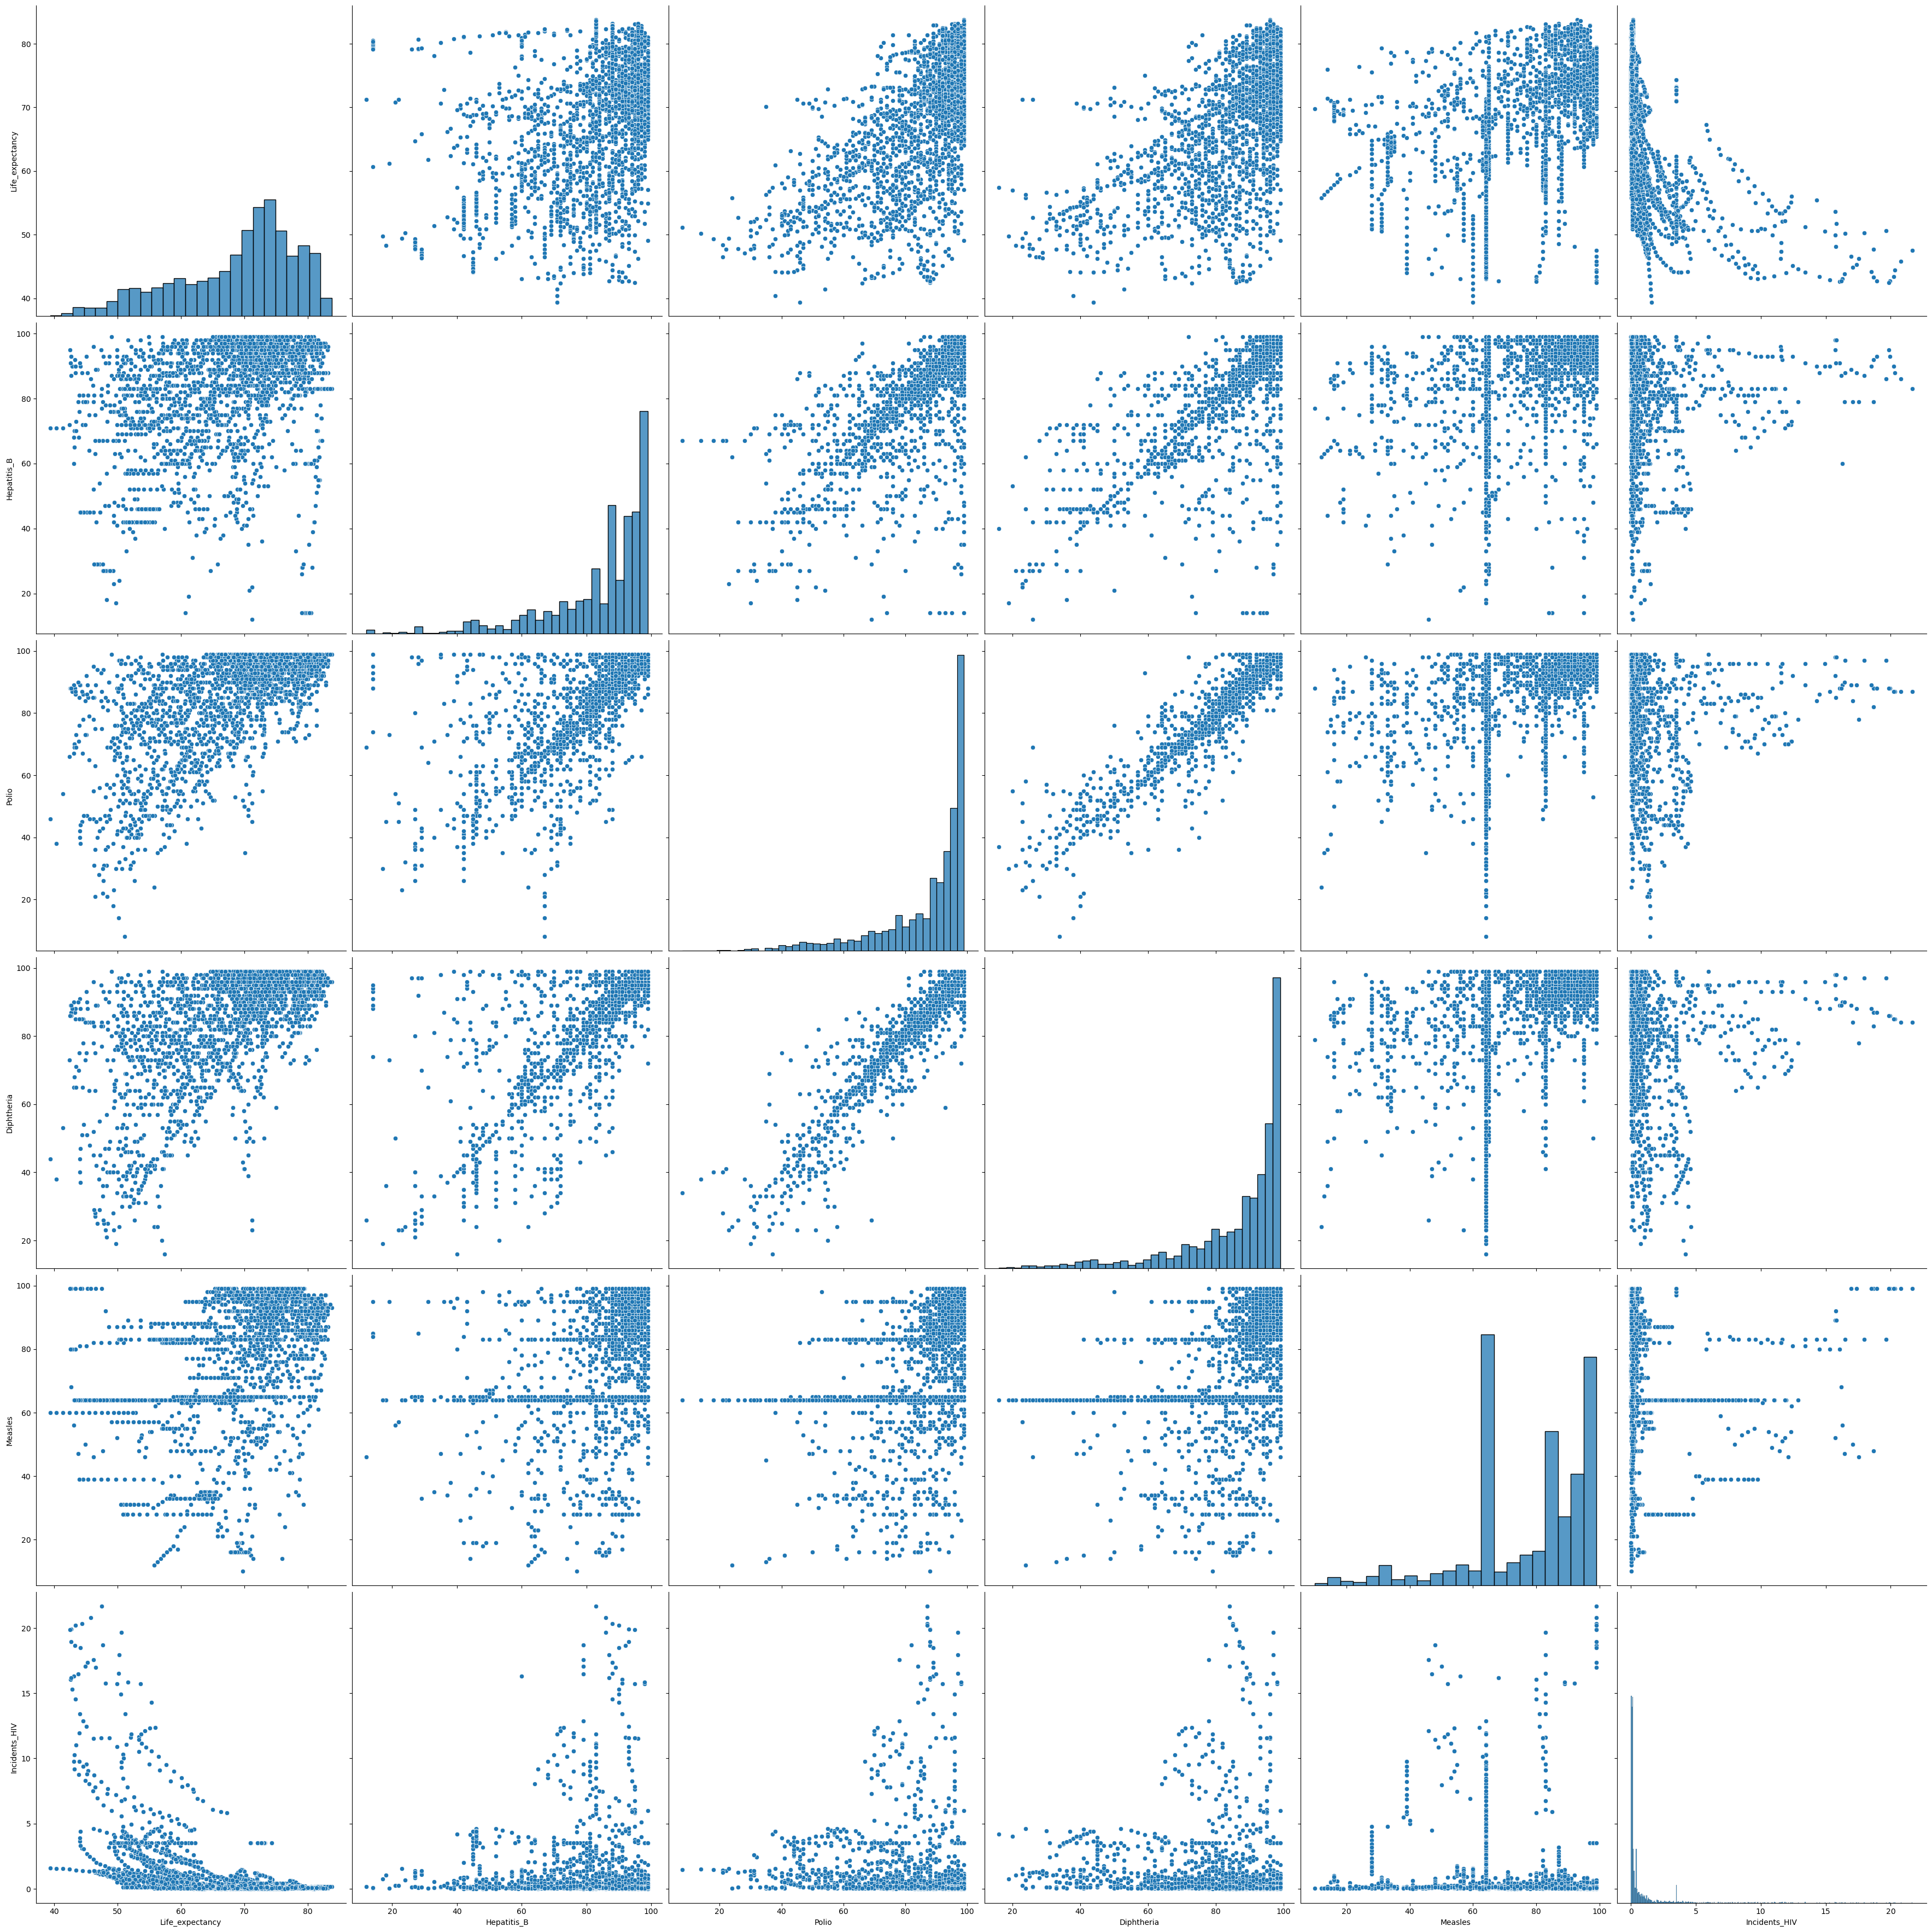

In [111]:
sns.pairplot(df[['Life_expectancy','Hepatitis_B','Polio','Diphtheria','Measles','Incidents_HIV']],
             height = 6)
plt.show()

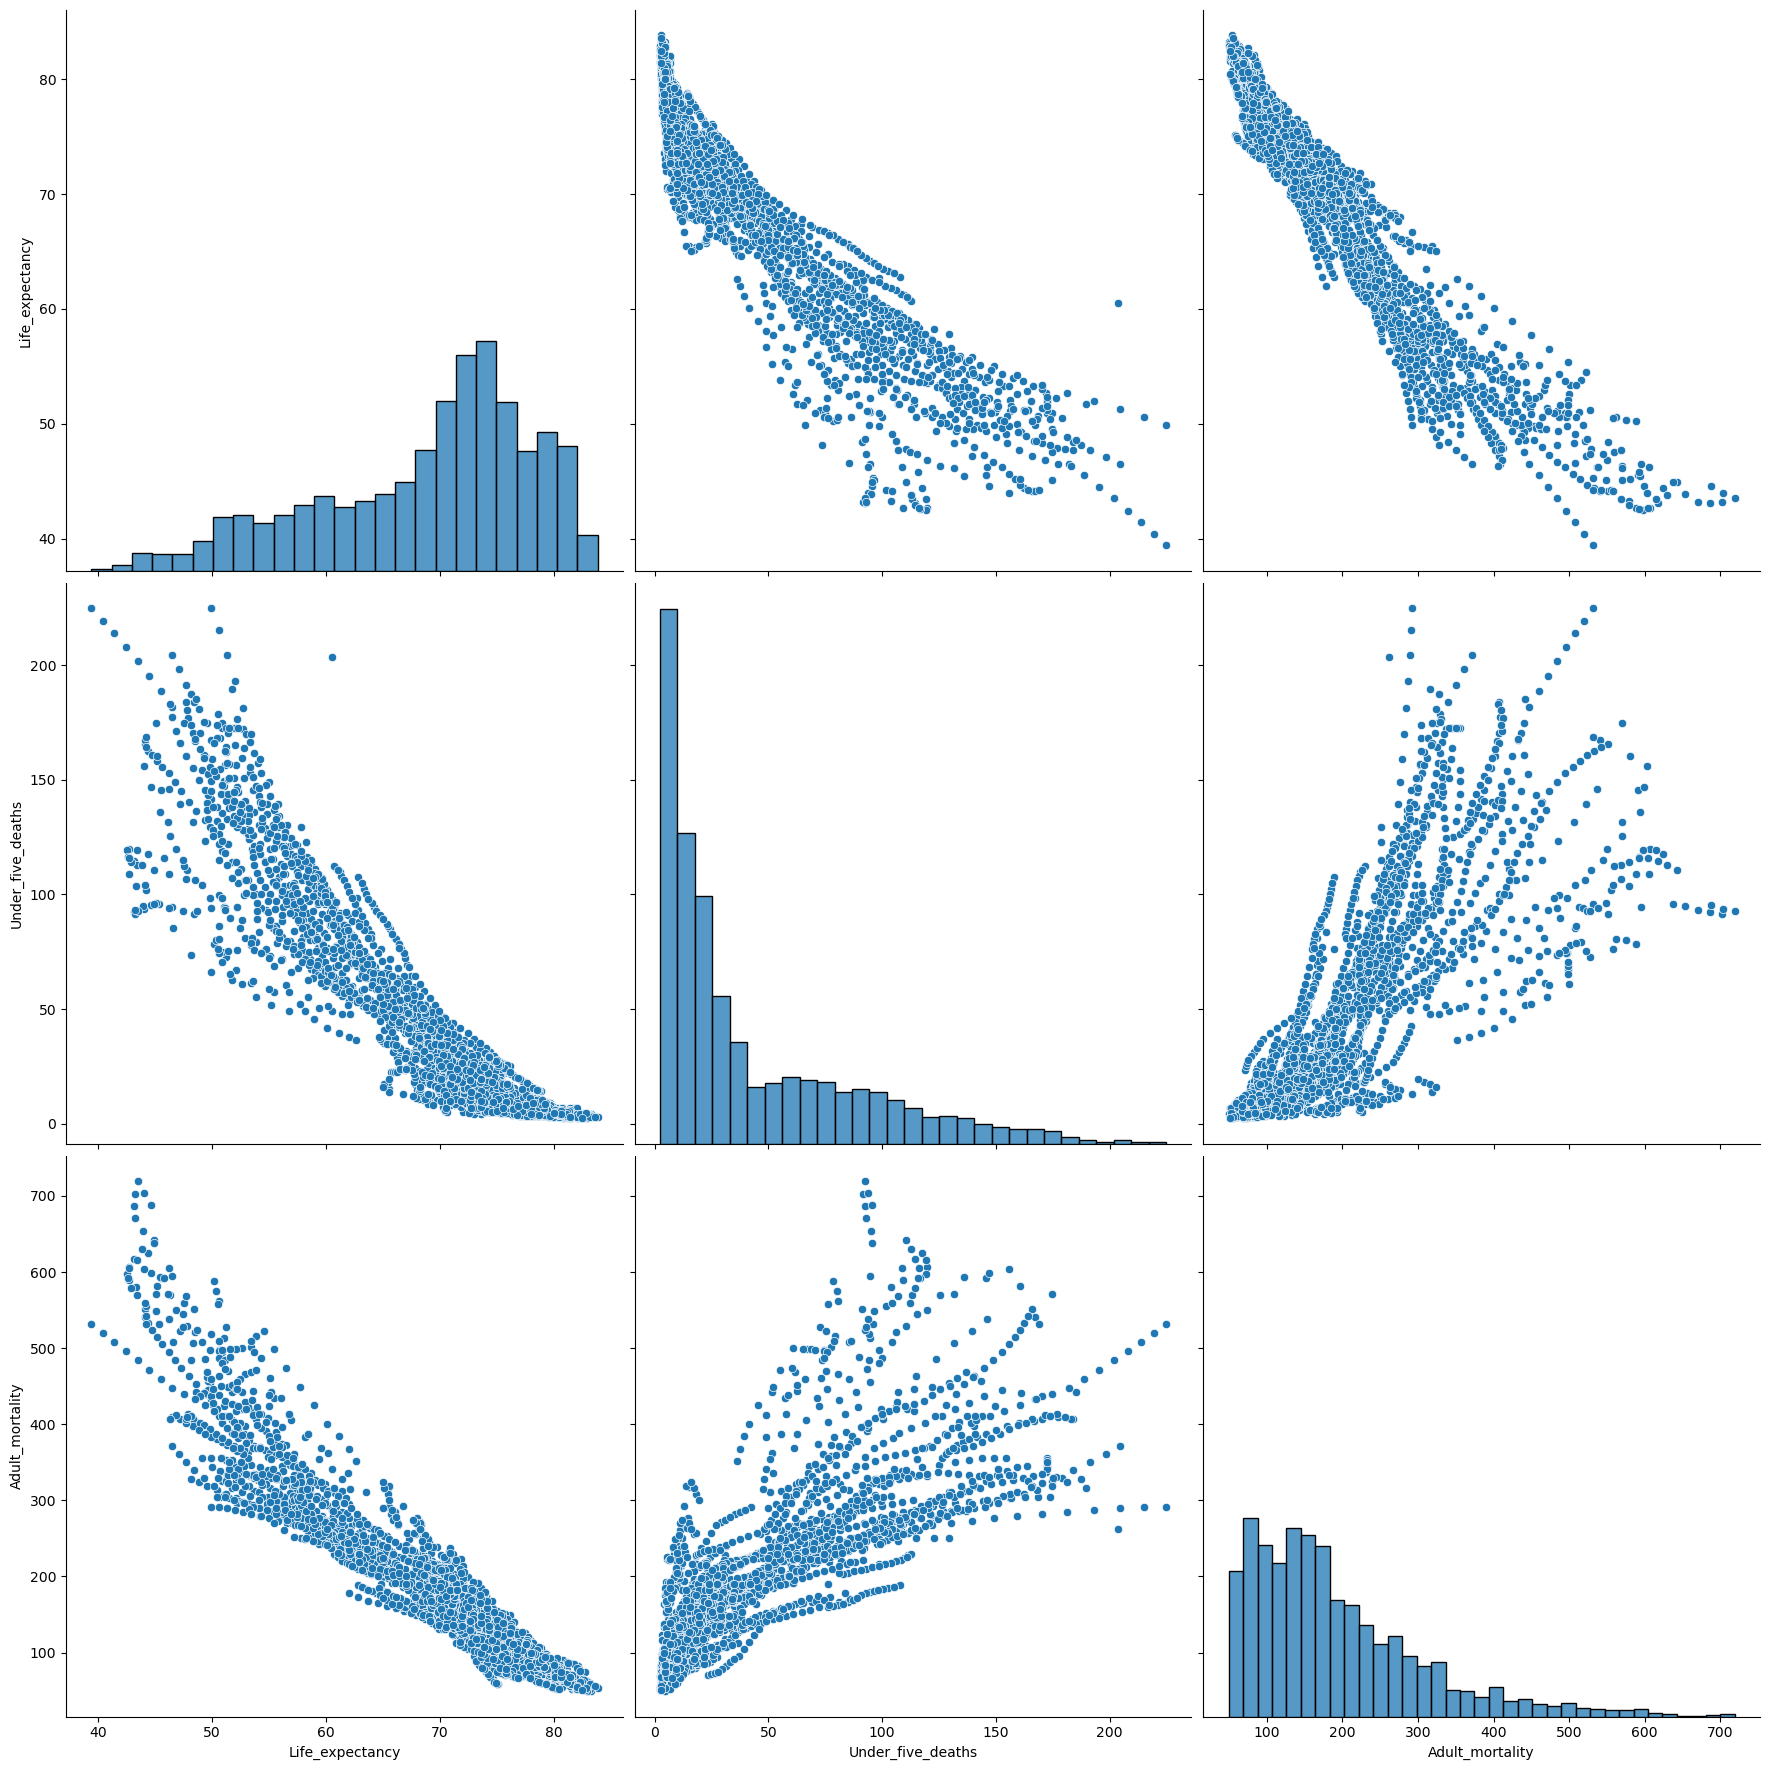

In [106]:
sns.pairplot(df[['Life_expectancy','Under_five_deaths','Adult_mortality']],
             height = 6)
plt.show()

In [112]:
X_train2.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Vietnam,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
233,2013,16.2,18.9,117.1050,1.84,60,74,31.8,81,67,...,0,0,0,0,0,0,0,0,0,0
2427,2004,6.2,7.1,60.3570,6.61,85,31,27.0,89,89,...,0,0,0,0,0,0,0,0,0,0
2711,2011,6.1,7.2,171.1380,10.11,89,92,26.3,92,92,...,0,0,0,0,0,0,0,0,0,0
2061,2006,16.5,19.3,86.8100,1.41,98,76,24.0,98,98,...,0,0,0,0,0,0,0,0,0,0
2365,2010,4.4,5.2,74.2785,10.01,88,86,27.0,94,94,...,1,0,0,0,0,0,0,0,0,0


In [113]:
def feature_eng(df):
        df = df.copy() #Create a local copy
        df = sm.add_constant(df) #Add a constating, as we are using statsmodels
        return df

In [114]:
X_train2 = X_train2.drop('Economy_status_Developed', axis = 1)

In [124]:
X_train2 = feature_eng(X_train2)

In [125]:
X_train2.columns

Index(['const', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio',
       ...
       'Country_United Kingdom', 'Country_United States', 'Country_Uruguay',
       'Country_Uzbekistan', 'Country_Vanuatu', 'Country_Venezuela, RB',
       'Country_Vietnam', 'Country_Yemen, Rep.', 'Country_Zambia',
       'Country_Zimbabwe'],
      dtype='object', length=204)

In [104]:
pd.reset_option('display.max_rows', 300)

In [126]:
feature_cols = ['const', 'carat', 'color', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium',
                'cut_Very Good', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
                'clarity_VVS1', 'clarity_VVS2', 'carat_ex']

## Create and train an OLS linear regression
lin_reg = sm.OLS(y_train, X_train2) # Creating model
results = lin_reg.fit() # Fit model and store/save it
results.summary() # Print the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4364.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        16:33:43   Log-Likelihood:                -1506.2
No. Observations:                2291   AIC:                             3402.
Df Residuals:                    2096   BIC:                             4521.
Df Model:                         194                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   -179.0554     12.529    -14.291      0.000    -203.627    -154.484
Year                                       0.1440      0.008     18.773      0.000       0.129       0.159
Infant_deaths                             -0.0126      0.008     -1.630      0.103      -0.028       0.003
Under_five_deaths                         -0.0418      0.004    -10.188      0.000      -0.050      -0.034
Adult_mortality                           -0.0407      0.001    -54.843      0.000      -0.042      -0.039
Alcohol_consumption                       -0.0147      0.014     -1.083      0.279      -0.041       0.012
Hepatitis_B                                0.0022      0.002      1.424      0.155      -0.001       0.005
Measles                                    0.0008      0.002      0.499      0.618      -0.002       0.004
BMI                                       -0.3995      0.072     -5.534      0.000      -0.541      -0.258
Polio                                     -0.0013      0.003     -0.431      0.666      -0.007       0.005
Diphtheria                                 0.0110      0.003      3.544      0.000       0.005       0.017
Incidents_HIV                              0.1446      0.029      5.027      0.000       0.088       0.201
GDP_per_capita                          2.624e-05   6.82e-06      3.848      0.000    1.29e-05    3.96e-05
Population_mln                             0.0002      0.001      0.121      0.904      -0.003       0.003
Thinness_ten_nineteen_years               -0.0173      0.008     -2.058      0.040      -0.034      -0.001
Thinness_five_nine_years                  -0.0092      0.008     -1.087      0.277      -0.026       0.007
Schooling                                 -0.0810      0.033     -2.474      0.013      -0.145      -0.017
Economy_status_Developing                -23.0429      1.482    -15.552      0.000     -25.949     -20.137
Region_Asia                               -2.5943      0.321     -8.071      0.000      -3.225      -1.964
Region_Central America and Caribbean       3.1507      0.113     27.834      0.000       2.929       3.373
Region_European Union                    -17.5736      1.289    -13.630      0.000     -20.102     -15.045
Region_Middle East                         0.7694      0.139      5.551      0.000       0.498       1.041
Region_North America                      -7.4253      0.581    -12.772      0.000      -8.565      -6.285
Region_Oceania                            -2.7883      0.204    -13.638      0.000      -3.189      -2.387
Region_Rest of Europe                     -2.4775      0.286     -8.667      0.000      -3.038      -1.917
Region_South America                       2.9645      0.100     29.571      0.000     

In [109]:
X_test = X_test.drop('Economy_status_Developed', axis = 1)

In [135]:
X_test1 = pd.get_dummies(X_test, columns = ['Region'], drop_first = True, prefix = 'Region', dtype = int)
X_test2 = pd.get_dummies(X_test1, columns = ['Country'], drop_first = True, prefix = 'Country', dtype = int)
X_test2.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Vietnam,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
2584,2011,3.4,4.1,78.1010,10.45,88,86,25.3,91,91,...,0,0,0,0,0,0,0,0,0,0
956,2015,38.9,55.7,311.7215,7.44,78,64,22.4,85,78,...,0,0,0,0,0,0,0,0,0,0
508,2008,102.5,152.8,494.9685,1.73,45,64,22.2,46,45,...,0,0,0,0,0,0,0,0,0,0
1548,2014,20.9,23.5,171.8160,6.18,96,65,26.4,95,96,...,0,0,0,0,0,0,0,0,0,0
2591,2001,20.6,24.3,167.9090,4.31,80,83,24.9,83,80,...,0,0,0,0,0,0,0,0,0,0


In [129]:
X_test2 = feature_eng(X_test2)

In [130]:
X_test2.shape

(573, 199)

In [127]:
y_pred = results.predict(X_train2)

# Get the RMSE of the model: y_train (real) against y_pred (predicted)
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(rmse)

0.466973987955943


In [128]:
y_test_pred = results.predict(X_test2)

# Get the RMSE of the model applied to the testing set
rmse_test = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse_test)

ValueError: shapes (573,198) and (204,) not aligned: 198 (dim 1) != 204 (dim 0)